In [1]:
import pandas
import h5py

In [2]:
path = '/scratch/data/anomaly/events_LHCO2020_backgroundMC_Pythia.h5'

In [3]:
df = pandas.read_hdf(path,stop=1000) # just read first 1000 events
df

,0,1,2,3,4,5,6,7,8,9,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,3.587869,-2.323472,-2.597121,1.497173,-2.480994,-2.269457,0.848844,-2.465643,-2.096595,0.961511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.921213,-0.745233,1.018857,0.689363,-0.642245,3.050711,1.999174,-0.343135,-0.322586,1.580572,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.580352,-2.412026,1.680236,0.429869,-0.778697,-1.453413,0.856914,-2.243512,0.217628,0.407344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.579134,-0.243543,-2.561824,0.312690,-0.283086,-0.281626,0.775053,-2.062494,-1.598718,0.868891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.644219,-2.457281,-2.670996,0.186128,-1.757650,2.719159,0.346987,-2.318233,-0.155036,0.501437,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.493004,-0.886976,-0.391002,0.534181,-2.081904,2.548825,0.458036,-1.230976,2.204294,0.639672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.404833,-0.510012,2.969482,0.300500,-2.248194,1.012964,0.316375,-1.815956,1.011110,0.604675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.407082,-2.195407,2.632497,0.413497,-1.212703,2.704103,0.578276,-0.291654,1.065150,0.508287,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.573155,-0.755578,0.347725,0.751455,-1.929361,0.759764,0.798534,-0.532149,0.979545,0.941284,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
import numpy as np
from pyjet import cluster,DTYPE_PTEPM
events_combined = df.values
print(events_combined.shape)

(1000, 2100)


In [5]:
#Now, let's cluster some jets!
jet_pt = []
jet_eta = []
jet_phi = []
jet_mass = []
offset = 0
offsets = [0]
for i in range(events_combined.shape[0]):
    pseudojets_input = np.zeros(len([x for x in events_combined[i][::3] if x > 0]), dtype=DTYPE_PTEPM)
    for j in range(700):
        if (events_combined[i][j*3]>0):
            pseudojets_input[j]['pT'] = events_combined[i][j*3]
            pseudojets_input[j]['eta'] = events_combined[i][j*3+1]
            pseudojets_input[j]['phi'] = events_combined[i][j*3+2]
        pass
    sequence = cluster(pseudojets_input, R=1.0, p=-1)
    jets = sequence.inclusive_jets(ptmin=20)
    offset += len(jets)
    offsets.append(offset)
    for k in range(len(jets)):
        jet_pt.append(jets[k].pt)
        jet_eta.append(jets[k].eta)
        jet_phi.append(jets[k].phi)
        jet_mass.append(jets[k].mass)

In [6]:
import coffea
jet_cands = coffea.analysis_objects.JaggedCandidateArray.candidatesfromoffsets(offsets,
                                                                  pt = jet_pt,
                                                                  eta = jet_eta,
                                                                  phi = jet_phi,
                                                                  mass = jet_mass)
print(jet_cands.pt[:10,0]) # high-est pT jet for first 10 events

[1411.11639973 1219.20639972 1374.17648335 1528.36074249 1397.77601548
 1271.81121371 1376.9702725  1241.98888119 1738.52192974 1639.42115452]


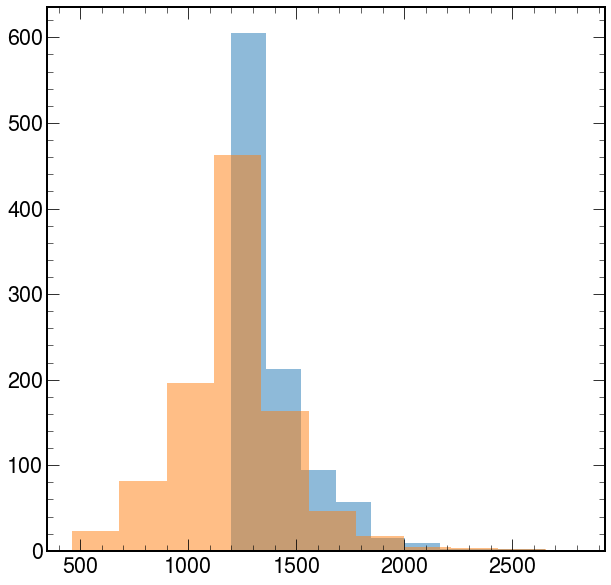

In [7]:
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
hist1  = plt.hist(jet_cands.pt[:,0],alpha=0.5) # highest pt jet
hist2  = plt.hist(jet_cands.pt[:,1],alpha=0.5) # second highest pt jet

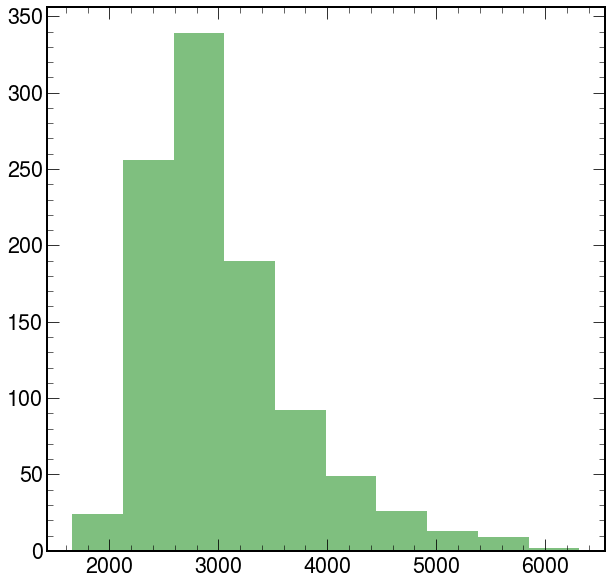

In [8]:
dijet_pairs = jet_cands[:,0:2].distincts() # pairs of two highest pT jets
dijet_mass = dijet_pairs.p4.sum().mass # invariant mass of two highest pT jets
hist3  = plt.hist(dijet_mass,alpha=0.5,color='g') 

In [ ]:
p2 = "/scratch/data/anomaly/events_LHCO2020_BlackBox1.h5"
bb1 = pandas.read_hdf(p2)
bb1

In [ ]:
p3 = "/scratch/data/anomaly/events_LHCO2020_BlackBox2.h5"
bb2 = pandas.read_hdf(p2)
bb2

In [ ]:
p4 = "/scratch/data/anomaly/events_LHCO2020_BlackBox3.h5"
bb3 = pandas.read_hdf(p4)
bb3